# Multi classification problem

# Getting CSV File for training

In [221]:
import pandas as pd

In [222]:
obesity_risk_csv = pd.read_csv('files/train.csv')
obesity_risk_csv.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [223]:
obesity_risk_csv.shape

(20758, 18)

In [224]:
from numpy.dtypes import Float64DType, Int64DType
def columns_description(df):
    for column_name in df:
        column = df[column_name]
        print("==================")
        print(column_name)
        print(f'Dropna=False: {column.nunique(dropna=False)} ; Dropna=True: {column.nunique(dropna=True)}')
        print(type(column.dtypes))
        #print(column.unique())

In [225]:
columns_description(df=obesity_risk_csv)

id
Dropna=False: 20758 ; Dropna=True: 20758
<class 'numpy.dtypes.Int64DType'>
Gender
Dropna=False: 2 ; Dropna=True: 2
<class 'numpy.dtypes.ObjectDType'>
Age
Dropna=False: 1703 ; Dropna=True: 1703
<class 'numpy.dtypes.Float64DType'>
Height
Dropna=False: 1833 ; Dropna=True: 1833
<class 'numpy.dtypes.Float64DType'>
Weight
Dropna=False: 1979 ; Dropna=True: 1979
<class 'numpy.dtypes.Float64DType'>
family_history_with_overweight
Dropna=False: 2 ; Dropna=True: 2
<class 'numpy.dtypes.ObjectDType'>
FAVC
Dropna=False: 2 ; Dropna=True: 2
<class 'numpy.dtypes.ObjectDType'>
FCVC
Dropna=False: 934 ; Dropna=True: 934
<class 'numpy.dtypes.Float64DType'>
NCP
Dropna=False: 689 ; Dropna=True: 689
<class 'numpy.dtypes.Float64DType'>
CAEC
Dropna=False: 4 ; Dropna=True: 4
<class 'numpy.dtypes.ObjectDType'>
SMOKE
Dropna=False: 2 ; Dropna=True: 2
<class 'numpy.dtypes.ObjectDType'>
CH2O
Dropna=False: 1506 ; Dropna=True: 1506
<class 'numpy.dtypes.Float64DType'>
SCC
Dropna=False: 2 ; Dropna=True: 2
<class 'numpy

# Data transforming

There is no *nan* values. It can iterate the Dataframe and convert to float type for each column

In [226]:
from numpy.dtypes import ObjectDType, Float64DType, Int64DType

nobeyesdad = pd.DataFrame({
    'NObeyesdad': obesity_risk_csv['NObeyesdad'].values
})

nobeyesdad['NObeyesdad_factorized'], unique = pd.factorize(nobeyesdad['NObeyesdad'])  # Return unique int value per string variable
nobeyesdad = nobeyesdad.drop_duplicates()  # Delete duplicated values
nobeyesdad = nobeyesdad.set_index('NObeyesdad_factorized')['NObeyesdad'].to_dict() # Convert to map using NObeyesdad_factorized as index

nobeyesdad

{0: 'Overweight_Level_II',
 1: 'Normal_Weight',
 2: 'Insufficient_Weight',
 3: 'Obesity_Type_III',
 4: 'Obesity_Type_II',
 5: 'Overweight_Level_I',
 6: 'Obesity_Type_I'}

In [227]:
def convert_dtypes(df):
    for column_name in df:
        column = df[column_name]
        if type(column.dtypes) == ObjectDType:
            column, unique = column.factorize()
            df[column_name] = column.astype(float)
        elif type(column.dtypes) == Int64DType:
            df[column_name] = column.astype(float)
        else: # For Float64DType 
            df[column_name] = column.astype(float)

In [228]:
convert_dtypes(df=obesity_risk_csv)
obesity_risk_csv

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,0.0,24.443011,1.699998,81.669950,0.0,0.0,2.000000,2.983297,0.0,0.0,2.763573,0.0,0.000000,0.976473,0.0,0.0,0.0
1,1.0,1.0,18.000000,1.560000,57.000000,0.0,0.0,2.000000,3.000000,1.0,0.0,2.000000,0.0,1.000000,1.000000,1.0,1.0,1.0
2,2.0,1.0,18.000000,1.711460,50.165754,0.0,0.0,1.880534,1.411685,0.0,0.0,1.910378,0.0,0.866045,1.673584,1.0,0.0,2.0
3,3.0,1.0,20.952737,1.710730,131.274851,0.0,0.0,3.000000,3.000000,0.0,0.0,1.674061,0.0,1.467863,0.780199,0.0,0.0,3.0
4,4.0,0.0,31.641081,1.914186,93.798055,0.0,0.0,2.679664,1.971472,0.0,0.0,1.979848,0.0,1.967973,0.931721,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753.0,0.0,25.137087,1.766626,114.187096,0.0,0.0,2.919584,3.000000,0.0,0.0,2.151809,0.0,1.330519,0.196680,0.0,0.0,4.0
20754,20754.0,0.0,18.000000,1.710000,50.000000,1.0,0.0,3.000000,4.000000,1.0,0.0,1.000000,0.0,2.000000,1.000000,0.0,0.0,2.0
20755,20755.0,0.0,20.101026,1.819557,105.580491,0.0,0.0,2.407817,3.000000,0.0,0.0,2.000000,0.0,1.158040,1.198439,1.0,0.0,4.0
20756,20756.0,0.0,33.852953,1.700000,83.520113,0.0,0.0,2.671238,1.971472,0.0,0.0,2.144838,0.0,0.000000,0.973834,1.0,1.0,0.0


# Data splitting

In [229]:
from sklearn.model_selection import train_test_split

obesity_risk_df = obesity_risk_csv.drop(columns=['id'])

x_df = obesity_risk_df.drop(columns=['NObeyesdad'])
y_df = obesity_risk_df['NObeyesdad'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=42)

# Data scaling

In [230]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [231]:
y_test.unique()

array([3, 5, 6, 4, 2, 0, 1])

# Tensor creation

In [232]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(data=X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(data=X_test, dtype=torch.float32)

# To be multi classification problem, the target dimension must be 1D
# e.g. tensor([1,2,3,4,5, ..., n]) NOT tensor([1],[2],[3], ...,[n])
y_train_tensor = torch.tensor(data=y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(data=y_test.values, dtype=torch.long)

train_dataset_tensor = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset_tensor = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset_tensor, batch_size=batch_size)
test_loader = DataLoader(test_dataset_tensor, batch_size=batch_size)

In [233]:
y_train_tensor

tensor([6, 2, 4,  ..., 5, 3, 6])

# Neuronal Network creation

In [234]:
import torch.nn as nn

class ObesityRiskModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(ObesityRiskModel, self).__init__()
        self.hd1 = nn.Linear(input_size, 64)
        self.hd2 = nn.Linear(64, 140)
        self.hd3 = nn.Linear(140, 150)
        self.hd5 = nn.Linear(150, 150)
        self.hd6 = nn.Linear(150, 140)
        self.hd4 = nn.Linear(140, output_size)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.hd1(x))
        x = self.relu(self.hd2(x))
        x = self.relu(self.hd3(x))
        x = self.relu(self.hd5(x))
        x = self.relu(self.hd6(x))
        x = self.hd4(x)
        return x

In [235]:
from torch import optim

input_size: int = X_train.shape[1]
model = ObesityRiskModel(input_size=input_size, output_size=7)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and testing functions

In [236]:
def train(model, train_loader, optimizer, criterion, epochs):
    loss_list = []
    iteration_list = []
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0
        
        for index, (bach_x, bach_y) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(bach_x)
           
            loss = criterion(outputs, bach_y)
            
           
            
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
        if epoch % 10 == 0:
            pass
            print(f'Epoch {epoch + 10} / {epochs}: Loss {epoch_loss:.4f}')
                
        loss_list.append(epoch_loss / len(train_loader))
        iteration_list.append(epoch)
    
    return loss_list, iteration_list
        

In [237]:
def test(model, test_loader, criterion):
    model.eval()
    epoch_loss = 0.0
    loss_list = []
    iteration_list = []
    
    for index, (bach_x, bach_y) in enumerate(test_loader):
        outputs = model(bach_x)
        loss = criterion(outputs, bach_y)
        epoch_loss += loss.item()
        
        print('Index {}, Loss {}'.format(index, loss.item()))
        
        loss_list.append(loss.item())
        iteration_list.append(index)
        
    return loss_list, iteration_list

In [238]:
loss_list_train, iteration_list_train = train(model=model, train_loader=train_loader, optimizer=optimizer, criterion=criterion, epochs=100)

Epoch 10 / 100: Loss 338.8650
Epoch 20 / 100: Loss 176.8010
Epoch 30 / 100: Loss 139.8780
Epoch 40 / 100: Loss 105.1973
Epoch 50 / 100: Loss 79.9005
Epoch 60 / 100: Loss 63.4975
Epoch 70 / 100: Loss 59.4854
Epoch 80 / 100: Loss 46.1728
Epoch 90 / 100: Loss 37.5798
Epoch 100 / 100: Loss 30.5646


In [239]:
loss_list_test, iteration_list_test = test(model=model, test_loader=test_loader, criterion=criterion)

Index 0, Loss 1.7106952667236328
Index 1, Loss 0.37562575936317444
Index 2, Loss 1.0951430797576904
Index 3, Loss 0.00878699216991663
Index 4, Loss 2.7026100158691406
Index 5, Loss 1.3565235137939453
Index 6, Loss 1.2523938417434692
Index 7, Loss 1.1735632419586182
Index 8, Loss 1.7374857664108276
Index 9, Loss 2.1953847408294678
Index 10, Loss 0.5131616592407227
Index 11, Loss 2.883596420288086
Index 12, Loss 2.523808002471924
Index 13, Loss 1.3492119312286377
Index 14, Loss 0.691094696521759
Index 15, Loss 0.22455324232578278
Index 16, Loss 1.1464022397994995
Index 17, Loss 1.1340117454528809
Index 18, Loss 0.6906485557556152
Index 19, Loss 0.4557949900627136
Index 20, Loss 2.9264886379241943
Index 21, Loss 1.6438219547271729
Index 22, Loss 2.657371759414673
Index 23, Loss 1.3142930269241333
Index 24, Loss 2.2219700813293457
Index 25, Loss 2.330564498901367
Index 26, Loss 1.4547936916351318
Index 27, Loss 1.2866116762161255
Index 28, Loss 1.4271966218948364
Index 29, Loss 1.720175266

# Plottling of Training data

Text(0.5, 1.0, 'TEST: Loss curve')

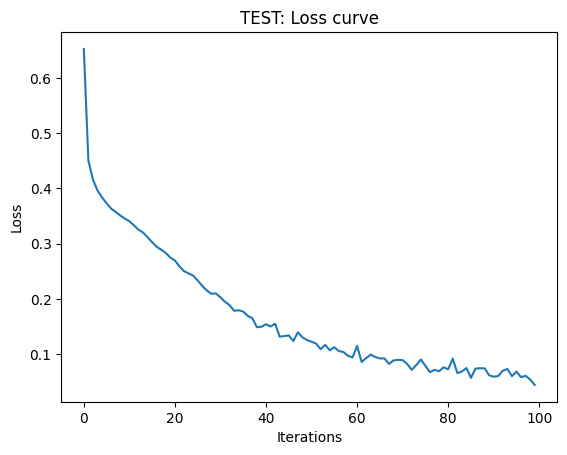

In [240]:
import matplotlib.pyplot as plt

plt.plot(iteration_list_train, loss_list_train)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('TEST: Loss curve')

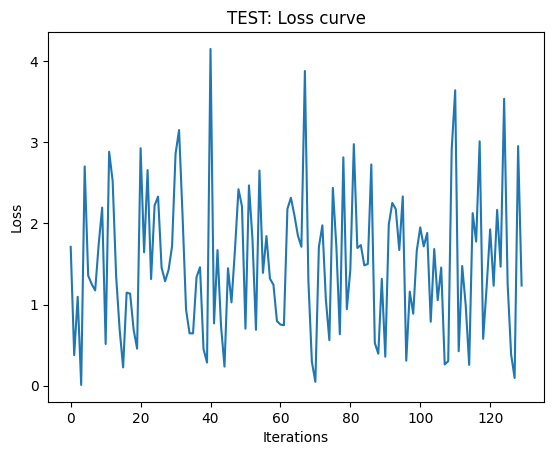

In [241]:
plt.plot(iteration_list_test, loss_list_test)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('TEST: Loss curve')
plt.show()

# Testig model

In [242]:
obesity_risk_test = pd.read_csv('files/test.csv')
columns_description(df=obesity_risk_test)

id
Dropna=False: 13840 ; Dropna=True: 13840
<class 'numpy.dtypes.Int64DType'>
Gender
Dropna=False: 2 ; Dropna=True: 2
<class 'numpy.dtypes.ObjectDType'>
Age
Dropna=False: 1539 ; Dropna=True: 1539
<class 'numpy.dtypes.Float64DType'>
Height
Dropna=False: 1739 ; Dropna=True: 1739
<class 'numpy.dtypes.Float64DType'>
Weight
Dropna=False: 1798 ; Dropna=True: 1798
<class 'numpy.dtypes.Float64DType'>
family_history_with_overweight
Dropna=False: 2 ; Dropna=True: 2
<class 'numpy.dtypes.ObjectDType'>
FAVC
Dropna=False: 2 ; Dropna=True: 2
<class 'numpy.dtypes.ObjectDType'>
FCVC
Dropna=False: 828 ; Dropna=True: 828
<class 'numpy.dtypes.Float64DType'>
NCP
Dropna=False: 649 ; Dropna=True: 649
<class 'numpy.dtypes.Float64DType'>
CAEC
Dropna=False: 4 ; Dropna=True: 4
<class 'numpy.dtypes.ObjectDType'>
SMOKE
Dropna=False: 2 ; Dropna=True: 2
<class 'numpy.dtypes.ObjectDType'>
CH2O
Dropna=False: 1366 ; Dropna=True: 1366
<class 'numpy.dtypes.Float64DType'>
SCC
Dropna=False: 2 ; Dropna=True: 2
<class 'numpy

In [243]:
column_id = obesity_risk_test.id
column_id

0        20758
1        20759
2        20760
3        20761
4        20762
         ...  
13835    34593
13836    34594
13837    34595
13838    34596
13839    34597
Name: id, Length: 13840, dtype: int64

In [244]:
obesity_risk_test = obesity_risk_test.drop(columns=['id'])
convert_dtypes(df=obesity_risk_test)
obesity_risk_test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.0,26.899886,1.848294,120.644178,0.0,0.0,2.938616,3.000000,0.0,0.0,2.825629,0.0,0.855400,0.000000,0.0,0.0
1,1.0,21.000000,1.600000,66.000000,0.0,0.0,2.000000,1.000000,0.0,0.0,3.000000,0.0,1.000000,0.000000,0.0,0.0
2,1.0,26.000000,1.643355,111.600553,0.0,0.0,3.000000,3.000000,0.0,0.0,2.621877,0.0,0.000000,0.250502,0.0,0.0
3,0.0,20.979254,1.553127,103.669116,0.0,0.0,2.000000,2.977909,0.0,0.0,2.786417,0.0,0.094851,0.000000,0.0,0.0
4,1.0,26.000000,1.627396,104.835346,0.0,0.0,3.000000,3.000000,0.0,0.0,2.653531,0.0,0.000000,0.741069,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,0.0,23.327836,1.721384,78.030383,0.0,1.0,2.813234,3.000000,0.0,0.0,1.000000,0.0,0.807076,0.778632,0.0,0.0
13836,1.0,29.000000,1.590000,62.000000,1.0,0.0,3.000000,3.000000,0.0,0.0,2.000000,0.0,0.000000,0.000000,0.0,0.0
13837,1.0,22.935612,1.585547,44.376637,1.0,0.0,3.000000,2.273740,2.0,0.0,2.000000,0.0,1.949840,1.000000,0.0,0.0
13838,0.0,21.000000,1.620000,53.000000,0.0,0.0,2.000000,3.000000,0.0,0.0,2.000000,0.0,3.000000,2.000000,1.0,0.0


In [245]:
test_df = scaler.transform(obesity_risk_test)  # Is transform or fir_transform
test_df_tensor = torch.tensor(data=test_df, dtype=torch.float32)

In [246]:
model.eval()
predictions = model(test_df_tensor)

# _ is the variable of the prediction with max value.
# prediction_index is the index of the variable with max value.
_, prediction_index = torch.max(predictions, dim=1)
prediction_index

tensor([4, 5, 3,  ..., 2, 1, 4])

In [247]:
predicted_flatten = prediction_index.numpy().flatten() # Flat the tensor to get an array

In [249]:
nobeyesdad_values = [nobeyesdad[index] for index in predicted_flatten]
nobeyesdad_values

['Obesity_Type_II',
 'Overweight_Level_I',
 'Obesity_Type_III',
 'Obesity_Type_I',
 'Obesity_Type_III',
 'Insufficient_Weight',
 'Insufficient_Weight',
 'Normal_Weight',
 'Overweight_Level_II',
 'Normal_Weight',
 'Insufficient_Weight',
 'Obesity_Type_III',
 'Obesity_Type_III',
 'Overweight_Level_II',
 'Obesity_Type_III',
 'Overweight_Level_II',
 'Obesity_Type_I',
 'Normal_Weight',
 'Obesity_Type_III',
 'Obesity_Type_I',
 'Normal_Weight',
 'Obesity_Type_III',
 'Obesity_Type_III',
 'Obesity_Type_II',
 'Overweight_Level_I',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_I',
 'Insufficient_Weight',
 'Obesity_Type_I',
 'Overweight_Level_II',
 'Obesity_Type_III',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Overweight_Level_I',
 'Overweight_Level_I',
 'Obesity_Type_I',
 'Normal_Weight',
 'Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_II',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Overweight_Level_II',
 'Overweight_Level_I',
 'Insufficient_Weight',
 'Overweight_Level_II',
 'Obesity

In [250]:
result = pd.DataFrame({
    'id': column_id,
    'NObeyesdad': nobeyesdad_values
})
result

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [251]:
result.to_csv('files/result.csv', index=False)